In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
data = pd.read_csv("data/titanic.csv", delimiter=",")
# x = data.iloc[:,2:]
# y = data.iloc[:,1]

In [190]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

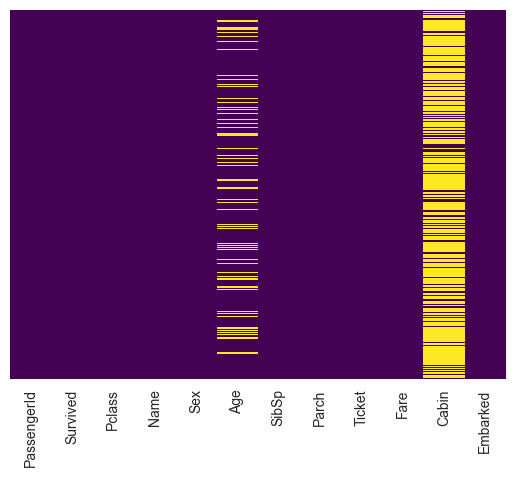

In [191]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_14525/2001018988.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

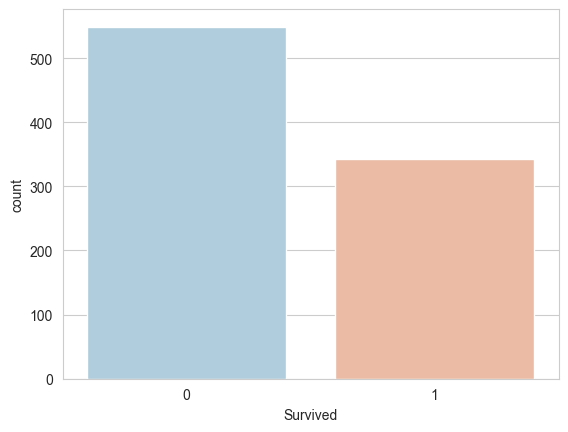

In [192]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

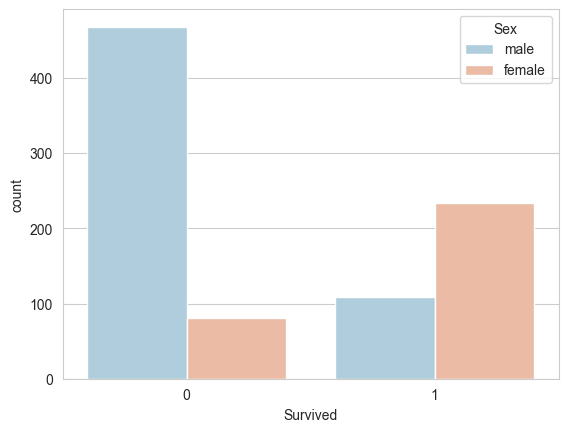

In [193]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

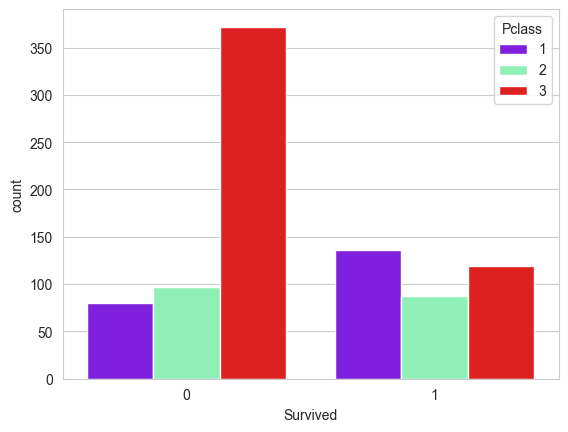

In [194]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data, palette='rainbow')

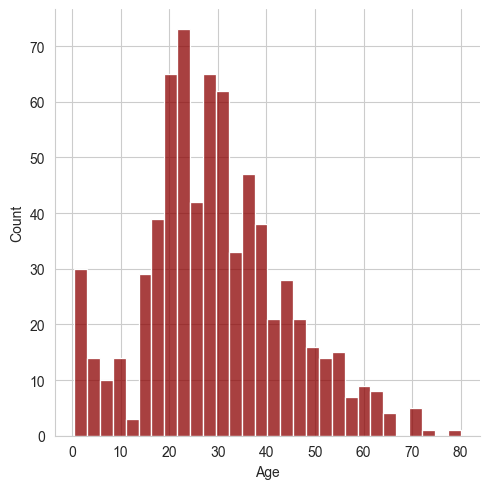

In [195]:
sns.set_style('whitegrid')
sns.displot(data['Age'].dropna(), color='darkred', bins=30,kde=False)

<Axes: >

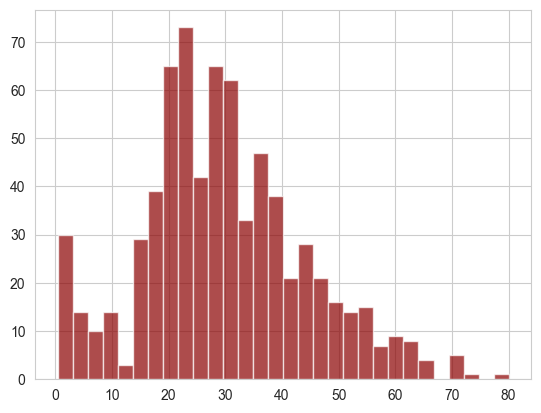

In [196]:
sns.set_style('whitegrid')
data['Age'].hist(color='darkred', bins=30,alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

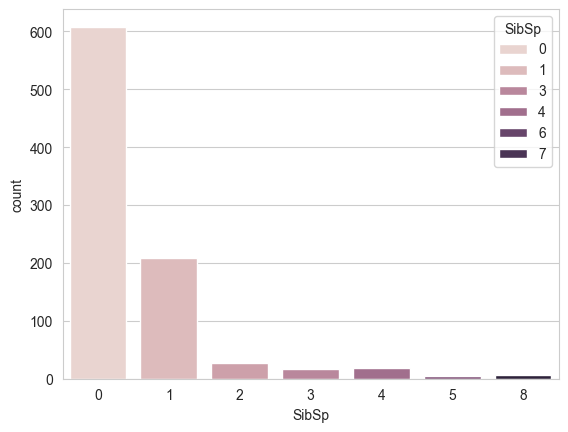

In [197]:
sns.set_style('whitegrid')
sns.countplot(data=data,x='SibSp', hue='SibSp')

<Axes: >

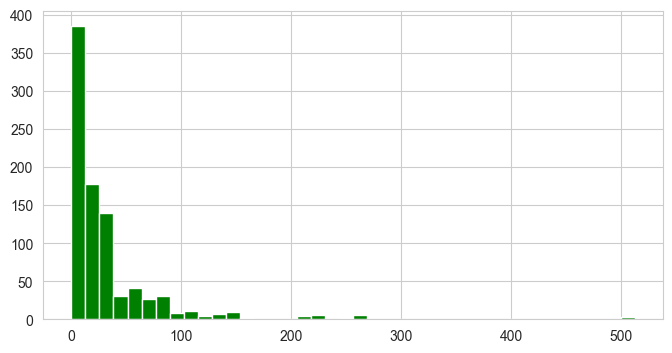

In [198]:
data['Fare'].hist(bins=40, figsize=(8,4), color='green')

In [199]:
import cufflinks as cf
cf.go_offline()

In [200]:
data['Fare'].iplot(kind='hist',bins=30,color='green')

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_14525/1683437585.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

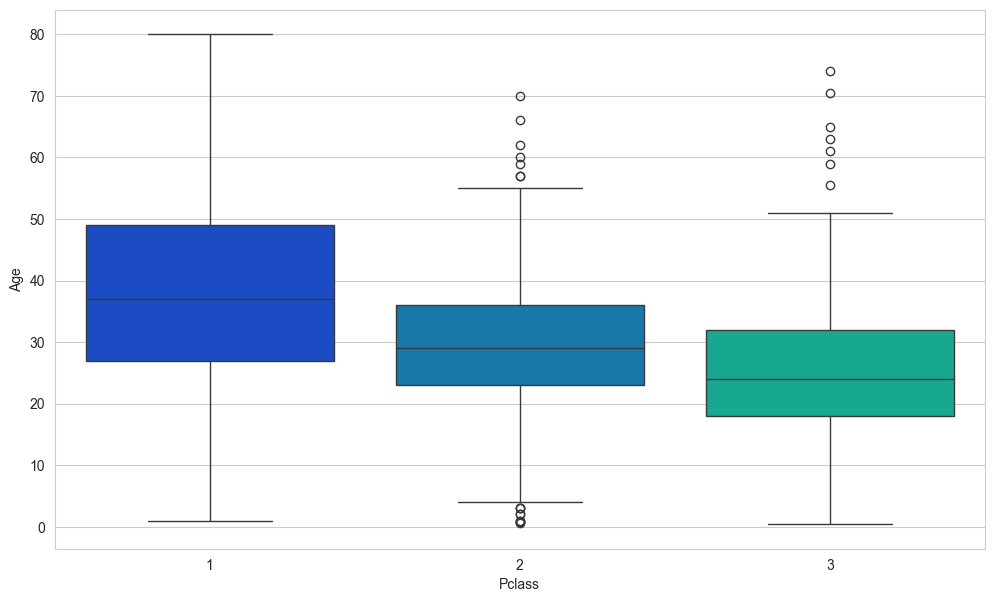

In [201]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [202]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [203]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_14525/822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_14525/822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [204]:
#drop cabin columns
data = data.drop(columns=['Cabin'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

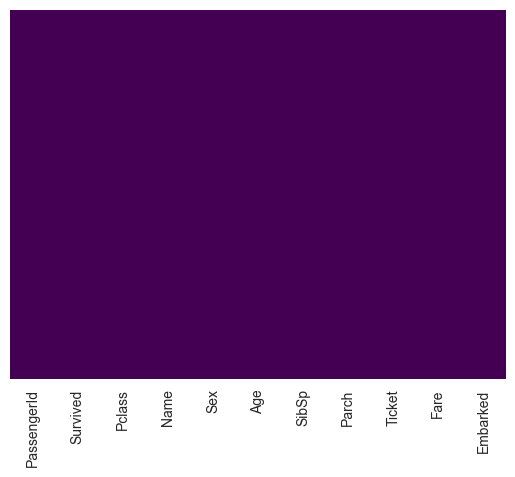

In [205]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [206]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [207]:
data.dropna(inplace=True,how='any')
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [208]:
x = data.iloc[:,2:]
y = data.iloc[:,1]

In [209]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [210]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [211]:
gender = pd.get_dummies(x['Sex'],drop_first=True)
gender

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [212]:
embark = pd.get_dummies(x['Embarked'],drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [213]:
x = x.drop(columns=['Name','Ticket','Sex','Embarked'])

In [214]:
x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,24.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [215]:
x = pd.concat([x,gender,embark],axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,24.0,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [218]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)

In [219]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test))
print("Recall:",recall_score(y_pred,y_test))
print("F1:",f1_score(y_pred,y_test))
print("Confusion Matrix:",confusion_matrix(y_pred,y_test))

Accuracy: 0.7528089887640449
Precision: 0.6575342465753424
Recall: 0.7164179104477612
F1: 0.6857142857142857
Confusion Matrix: [[86 25]
 [19 48]]


In [221]:

from sklearn.ensemble import RandomForestClassifier
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
RF = RandomForestClassifier()
params = {'n_estimators': [100, 200, 300, 400, 500], 
          'max_depth': [3,5,7,9,12], 
          'oob_score' : [False, True],
          'max_features' : [4,6,8],
          'criterion': ['gini', 'entropy', 'log_loss']
}
grid = GridSearchCV(estimator=RF, 
                      param_grid=params,
                      cv=cv,
                      scoring="accuracy",
                      n_jobs=-1)

grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

print(grid.best_params_)
print(grid.best_score_)
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test))
print("Recall:",recall_score(y_pred,y_test))
print("F1:",f1_score(y_pred,y_test))
print("Confusion Matrix:",confusion_matrix(y_pred,y_test))

{'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'n_estimators': 300, 'oob_score': True}
0.8410420565350142
Accuracy: 0.7921348314606742
Precision: 0.6712328767123288
Recall: 0.7903225806451613
F1: 0.725925925925926
Confusion Matrix: [[92 24]
 [13 49]]


## Other imputers
### Simple Imputer

In [222]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer

In [223]:
data = pd.read_csv("data/titanic.csv", delimiter=",")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [225]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
data.drop(columns=['Cabin','Embarked'], inplace=True)

In [228]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250


In [231]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[['Age']])

SimpleImputer()

In [232]:
data['Age'] = imputer.transform(data[['Age']])


In [233]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

### KNNImputer

In [234]:
data = pd.read_csv("data/titanic.csv", delimiter=",")
data.drop(columns=['Cabin','Embarked'], inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [239]:
imputer = KNNImputer(n_neighbors=5,
                     missing_values=np.nan)

In [240]:
data['Age'] = imputer.fit_transform(data[['Age']])

In [241]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [242]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### iterative_imputer

In [243]:
data = pd.read_csv("data/titanic.csv", delimiter=",")
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [244]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [271]:
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
imputer = IterativeImputer(estimator=KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3),
                           missing_values=np.nan,
                           max_iter=10,
                           initial_strategy='constant',
                           n_nearest_features=3,
                           tol=0.1
                           )
                           

In [272]:
data['Age'] = imputer.fit_transform(data[['Age']])

In [273]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [274]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64